# Model Evaluation
This notebook evaluates the Random Forest model and creates evaluation metrics and visualizations.

In [7]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the data and model
import os
# Get the project root directory (parent of notebooks)
project_root = os.path.dirname(os.getcwd())
data_path = os.path.join(project_root, 'data', 'processed', 'cleaned.csv')
model_path = os.path.join(project_root, 'models', 'randomforest.pkl')
df = pd.read_csv(data_path)
X, y = df.drop('loan_approved', axis=1), df['loan_approved']
rf = joblib.load(model_path)
print("Data and model loaded successfully")

Data and model loaded successfully


In [9]:
# Generate predictions
y_pred = rf.predict(X)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1121    0]
 [   0  879]]


FileNotFoundError: [Errno 2] No such file or directory: 'reports/confusion_matrix.png'

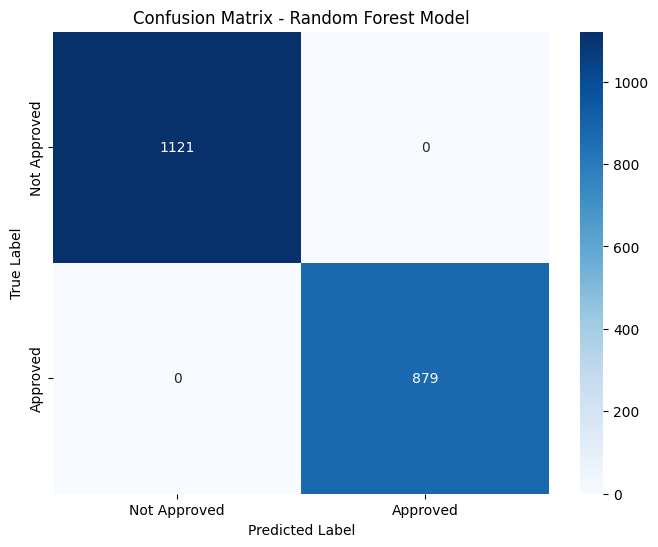

In [10]:
# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix - Random Forest Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('reports/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=['Not Approved', 'Approved']))

Classification Report:
              precision    recall  f1-score   support

Not Approved       1.00      1.00      1.00      1121
    Approved       1.00      1.00      1.00       879

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Calculate and display final metrics
rf_accuracy = accuracy_score(y, y_pred)
rf_f1 = f1_score(y, y_pred)

print(f"Random Forest Model Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Random Forest Model Performance:
Accuracy: 1.0000
F1 Score: 1.0000
